# The simplest possible autoencoder

MNIST 데이터셋을 사용하는 가장 간단한 오토인코더를 만들어봅시다.

by [Francois Chollet](https://twitter.com/fchollet) in [Tutorials](https://blog.keras.io/category/tutorials.html)<br>
Modified by uramoon@kw.ac.kr

## TODO1: 인코더와 디코더 만들기
오토인코더는 인코더와 디코더가 합쳐진 것으로서 입력받은 데이터를 인코더가 압축한 후 디코더가 압축을 풀어 입력받은 데이터와 최대한 비슷한 데이터를 출력하는 것이 목표입니다. (훈련 데이터를 어떻게 압축하면 좋을까 학습하는 모델)
1. 인코더는 784개의 실수를 입력 받아 32개의 실수를 출력합니다.
2. 디코더는 32개의 실수를 입력 받아 784개의 실수를 출력합니다.<br>
(인코더가 입력받은 784개의 실수와 가급적 비슷한 실수를 출력)

In [1]:
from keras.activations import sigmoid
import keras
from keras import layers

# 784개의 실수를 32개로 줄이는 손실 압축을 수행할 것입니다.
encoding_dim = 32  

# TODO: 784개의 실수를 입력 받아 32개의 실수를 출력하는 인코더를 만들어보세요.
encoder = keras.Sequential(layers.Dense(encoding_dim, activation='relu', input_shape=(784,)))

# TODO: 32개의 실수를 입력 받아 784개의 실수를 출력하는 디코더를 만들어보세요.
# Hint: 출력 중에서 max값을 찾는 것이 아니기 때문에 784개 각각의 출력이 0부터 1사이의 값이 
# 나오도록 s자 모양의 활성화 함수를 사용하셔야 합니다.
decoder = keras.Sequential(layers.Dense(784, activation='sigmoid', input_shape=(32,)))

## TODO2: 오토인코더 만들기


In [2]:
autoencoder = keras.models.Sequential()

# TODO: 입력층 만들기
autoencoder.add(layers.Input(shape=(784,)))

# TODO: 인코더 추가하기
autoencoder.add(encoder)

# TODO: 디코더 추가하기
autoencoder.add(decoder)

MSE (mean squared error)를 사용하여 입력된 그림과 출력된 그림의 차이를 최소화합니다.

In [3]:
autoencoder.compile(optimizer='adam', loss='mse')

In [52]:
autoencoder.summary()

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_13 (Sequential)  (None, 32)                25120     
                                                                 
 sequential_14 (Sequential)  (None, 784)               25872     
                                                                 
Total params: 50,992
Trainable params: 50,992
Non-trainable params: 0
_________________________________________________________________


## MNIST 불러오기

In [4]:
from keras.datasets import mnist
import numpy as np

# 비지도학습이므로 y값은 필요가 없습니다.
(x_train, _), (x_test, _) = mnist.load_data()

11501568/11490434 [==============================] - 1s 0us/step


In [5]:
# x값 모양 살펴보기
print(x_train.shape)
print(x_test.shape)

(60000, 28, 28)
(10000, 28, 28)


### TODO3: MNIST 전처리

In [6]:
# TODO: 정규화
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

# TODO: 2차원 그림을 1차원으로 reshape (장수는 유지)
x_train = x_train.reshape((60000, 28 * 28))
x_test = x_test.reshape(10000, 28 * 28)

In [7]:
# x값 모양 살펴보기
print(x_train.shape)
print(x_test.shape)

(60000, 784)
(10000, 784)


## TODO4: 모델 훈련

In [8]:
from keras.callbacks import EarlyStopping
# TODO: 자유롭게 설정
es = EarlyStopping(patience=5)

# TODO: 입력(X)과 정답(y)을 동일하게 설정합니다.
autoencoder.fit(x_train, x_train, # 입력과 정답이 동일
                epochs=10000,
                batch_size=256,                
                callbacks=es,
                validation_data=(x_test, x_test)) # 테스트 데이터를 검증 데이터로 사용                                                 
                                                # 검증 데이터도 입력과 정답이 동일

Epoch 1/10000
235/235 [==============================] - 7s 9ms/step - loss: 0.0706 - val_loss: 0.0407
Epoch 2/10000
235/235 [==============================] - 2s 8ms/step - loss: 0.0348 - val_loss: 0.0294
Epoch 3/10000
235/235 [==============================] - 2s 8ms/step - loss: 0.0266 - val_loss: 0.0236
Epoch 4/10000
235/235 [==============================] - 2s 7ms/step - loss: 0.0219 - val_loss: 0.0197
Epoch 5/10000
235/235 [==============================] - 1s 6ms/step - loss: 0.0186 - val_loss: 0.0168
Epoch 6/10000
235/235 [==============================] - 1s 5ms/step - loss: 0.0161 - val_loss: 0.0147
Epoch 7/10000
235/235 [==============================] - 1s 4ms/step - loss: 0.0143 - val_loss: 0.0133
Epoch 8/10000
235/235 [==============================] - 1s 4ms/step - loss: 0.0131 - val_loss: 0.0123
Epoch 9/10000
235/235 [==============================] - 1s 4ms/step - loss: 0.0122 - val_loss: 0.0115
Epoch 10/10000
235/235 [==============================] - 1s 4ms/step - l

## TODO5: 인코더와 디코더 사용
오토인코더의 앞 부분을 인코더, 뒷 부분을 디코더로 사용합니다.

In [9]:
# TODO: 테스트 데이터의 처음 10장을 인코딩
encoded_imgs = encoder.predict(x_test[0:10])

# 인코딩된 그림을 디코딩
decoded_imgs = decoder.predict(encoded_imgs)

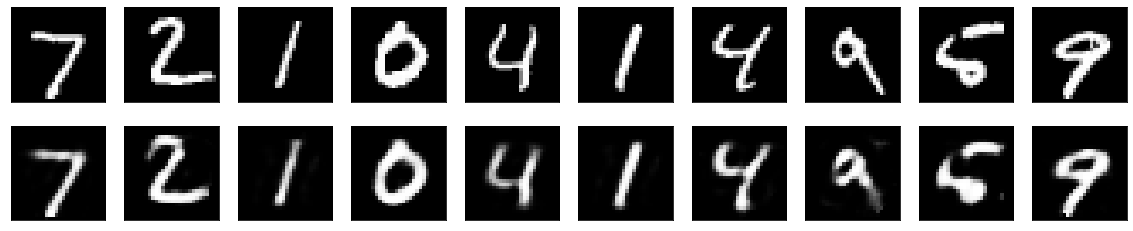

In [10]:
# 원본 그림과 오토인코더가 출력한 그림 그려보기 (이해하실 필요 없습니다.)
import matplotlib.pyplot as plt

n = 10  # How many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # Display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

## TODO6: 직접 그린 그림 넣어보기
six.png와 dix.png를 Colab에 붙여넣기 하세요.<br>
MNIST와 필체가 다른 그림도 압축했다가 복원 가능한지 확인해봅시다.

In [11]:
# 이해할 필요 없습니다.
# image_prepare(파일이름)으로 호출하면 정규화된 일차원 리스트를 반환합니다.

import numpy as np
from PIL import Image, ImageFilter

def image_prepare(argv):
    """
    This function returns the pixel values.
    The imput is a png file location.
    """
    im = Image.open(argv).convert('L')
    width = float(im.size[0])
    height = float(im.size[1])
    newImage = Image.new('L', (28, 28), (255))  # creates white canvas of 28x28 pixels

    if width > height:  # check which dimension is bigger
        # Width is bigger. Width becomes 20 pixels.
        nheight = int(round((20.0 / width * height), 0))  # resize height according to ratio width
        if (nheight == 0):  # rare case but minimum is 1 pixel
            nheight = 1
            # resize and sharpen
        img = im.resize((20, nheight), Image.ANTIALIAS).filter(ImageFilter.SHARPEN)
        wtop = int(round(((28 - nheight) / 2), 0))  # calculate horizontal position
        newImage.paste(img, (4, wtop))  # paste resized image on white canvas
    else:
        # Height is bigger. Heigth becomes 20 pixels.
        nwidth = int(round((20.0 / height * width), 0))  # resize width according to ratio height
        if (nwidth == 0):  # rare case but minimum is 1 pixel
            nwidth = 1
            # resize and sharpen
        img = im.resize((nwidth, 20), Image.ANTIALIAS).filter(ImageFilter.SHARPEN)
        wleft = int(round(((28 - nwidth) / 2), 0))  # caculate vertical pozition
        newImage.paste(img, (wleft, 4))  # paste resized image on white canvas

    # newImage.save("sample.png

    tv = list(newImage.getdata())  # get pixel values
    max = np.max(tv)

    # normalize pixels to 0 and 1. 0 is pure white, 1 is pure black.
    tva = [(max - x) * 1.0 / max for x in tv]

    # 수정할 곳
    return tva

six는 6이지만 dix는 숫자가 아닙니다. 복원이 될까요?

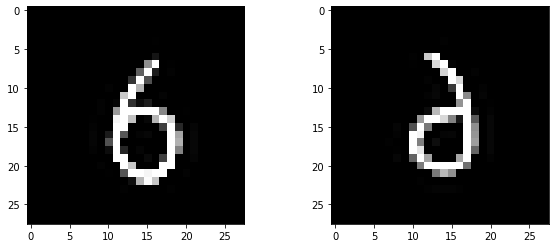

In [13]:
# six와 dix 그려보기
six = np.asarray(image_prepare('six.png'))
dix = np.asarray(image_prepare('dix.png'))

plt.figure(figsize=(10, 4))
ax = plt.subplot(1, 2, 1)
plt.imshow(six.reshape(28, 28))
plt.gray()
ax = plt.subplot(1, 2, 2)
plt.imshow(dix.reshape(28, 28))
plt.gray()
plt.show()

In [14]:
# TODO: our_images에 비어있는 NumPy 배열을 할당합니다. (모양: 2장, 길이 784 배열)
# Hint: https://numpy.org/doc/stable/reference/generated/numpy.empty.html
our_images = np.empty([2,784])
our_images[0] = six
our_images[1] = dix

In [15]:
# TODO: our_images 인코딩하기
our_encoded_imgs = encoder.predict(our_images)

# TODO: our_encoded_imgs 디코딩하기
our_decoded_imgs = decoder.predict(our_encoded_imgs)

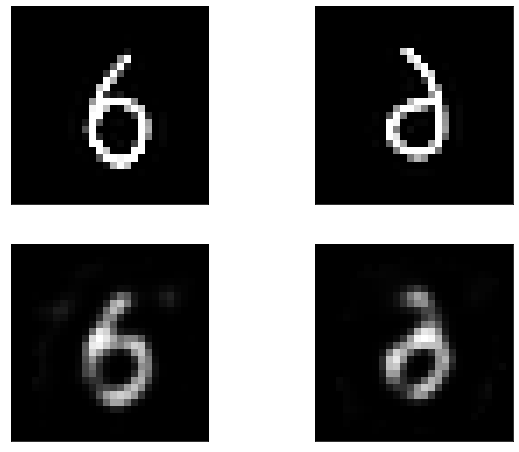

In [16]:
# 원본 그림과 오토인코더가 출력한 그림 그려보기 (이해하실 필요 없습니다.)
import matplotlib.pyplot as plt

n = 2  # How many digits we will display
plt.figure(figsize=(10, 8))
for i in range(n):
    # 위는 원본
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(our_images[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # 아래는 오토인코더 출력
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(our_decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

필체가 다르고 보지 못한 패턴도 어느 정도 복원이 가능한 것을 확인할 수 있습니다. 이상 데이터에 대해서도 원본 데이터를 잘 복원하는 경우가 있기 때문에 오토인코더로 이상 데이터 판별 시 주의할 필요가 있습니다.

## TODO7: Fashion MNIST 사용해보기
Fashion MNIST도 복원 가능할까요?

In [17]:
# Fashion MNIST 불러오기
from keras.datasets import fashion_mnist
(_, _), (test_images, _) = fashion_mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


In [18]:
# test_images 모양
test_images.shape

(10000, 28, 28)

In [19]:
# TODO: 정규화
test_images = test_images.astype('float32') / 255

# TODO: 그림 1차원으로 reshape
test_images = test_images.reshape((10000, 28 * 28))

In [20]:
# TODO: 테스트 데이터의 처음 10장을 인코딩
encoded_imgs = encoder.predict(test_images[0:10])

# TODO: 인코딩된 그림을 디코딩
decoded_imgs = decoder.predict(encoded_imgs)

### 그림으로 결과 확인하기
복원이 잘 되나요?

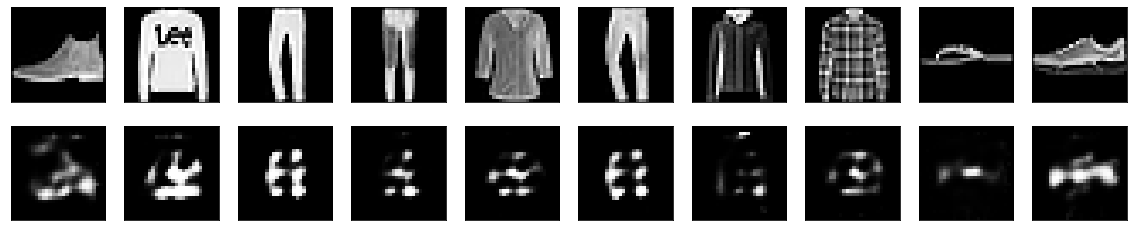

In [21]:
# 원본 그림과 오토인코더가 출력한 그림 그려보기 (이해하실 필요 없습니다.)

n = 10  # How many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # Display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(test_images[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

## TODO8: 무작위로 숫자 그림 생성해보기

In [22]:
# 32개의 실수로 구성된 10장의 인코딩된 그림을 생성합니다.
rand_encoded_imgs = np.random.randn(10, 32)

# TODO: 디코딩합니다.
decoded_imgs = decoder.predict(rand_encoded_imgs)

### 그려보기
잘 그려질까요? <br>
해결책: VAE (variational autoencoder)<br>
현재는 32개의 실수가 어떻게 분포하는지 알 수 없어 그럴듯한 인코딩된 그림을 만들 수 없는데 32개의 실수의 분포가 특정한 분포를 따르도록 강제하고 해당 분포에서 무작위로 샘플링하면 그럴듯한 그림을 무작위로 그릴 수 있습니다.

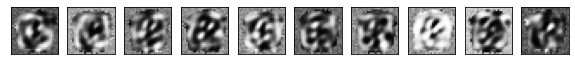

In [23]:
n = 10  # How many digits we will display
plt.figure(figsize=(10, 4))
for i in range(n):
    # Display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()